In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from graspy.simulations import rdpg
from graspy.plot import heatmap
from graspy.utils import symmetrize

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.mgc.mgc import MGC

from simulations import *
from utils import *

In [2]:
def rho_rdpg(rho, n=50):
    X = np.random.uniform(0, 1, (n, 1))
    P = np.dot(X, X.T)
    A = rdpg(X, rescale=False, loops=False)
    B = np.random.binomial(1, (1-rho)*P + rho*A)
    B = B.astype(np.float64)
    B = symmetrize(B)
    np.fill_diagonal(B, 0)
    return A, B

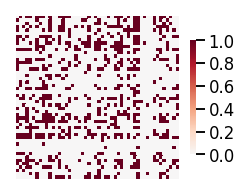

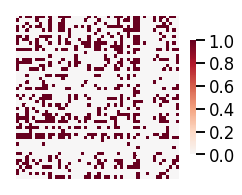

In [3]:
A, B = rho_rdpg(rho=0.9)
heatmap(A, figsize=(4, 3))
heatmap(B, figsize=(4, 3))

In [22]:
rho_arr = np.array([0, 0.1, 0.3])
n_arr = np.linspace(10, 50, 5, dtype=int)
test = RVCorr(which_test='pearson')
pearson_power = np.zeros((rho_arr.shape[0], n_arr.shape[0]))
for i, rho in enumerate(rho_arr):
    for j, n in enumerate(n_arr):
        pearson_power[i, j] = power(test, rho_rdpg, triu_no_diag, rho=rho, n=n)

In [23]:
pearson_power

array([[0.28 , 0.8  , 0.968, 0.998, 0.998],
       [0.482, 0.926, 0.998, 1.   , 1.   ],
       [0.824, 1.   , 1.   , 1.   , 1.   ]])

In [24]:
rho_arr = np.array([0, 0.1, 0.3])
n_arr = np.linspace(10, 50, 5, dtype=int)
test = DCorr(compute_distance_matrix=identity)
dcorr_power = np.zeros((rho_arr.shape[0], n_arr.shape[0]))
for i, rho in enumerate(rho_arr):
    for j, n in enumerate(n_arr):
        dcorr_power[i, j] = power(test, rho_rdpg, to_distance_mtx, rho=rho, n=n)

In [25]:
dcorr_power

array([[0.108, 0.2  , 0.304, 0.43 , 0.442],
       [0.216, 0.54 , 0.854, 0.974, 0.996],
       [0.624, 0.992, 1.   , 1.   , 1.   ]])

In [26]:
rho_arr = np.array([0, 0.1, 0.3])
n_arr = np.linspace(10, 50, 5, dtype=int)
test = MGC(compute_distance_matrix=identity)
mgc_power = np.zeros((rho_arr.shape[0], n_arr.shape[0]))
for i, rho in enumerate(rho_arr):
    for j, n in enumerate(n_arr):
        mgc_power[i, j] = power(test, rho_rdpg, to_distance_mtx, rho=rho, n=n)

In [27]:
mgc_power

array([[0.15 , 0.22 , 0.348, 0.586, 0.794],
       [0.34 , 0.604, 0.892, 0.98 , 1.   ],
       [0.65 , 0.99 , 1.   , 1.   , 1.   ]])

In [34]:
n_arr = np.linspace(10, 100, 10, dtype=int)
test_names = ['pearson', 'dcorr', 'mgc']
power_rho_zero_rdpg = {
    'pearson': [],
    'dcorr': [],
    'mgc': []
}
for name in test_names:
    for n in n_arr:
        if name == 'pearson':
            test = RVCorr(which_test='pearson')
            power_rho_zero_rdpg[name].append(power(test, rho_rdpg, triu_no_diag, rho=0, n=n))
        elif name == 'dcorr':
            test = DCorr(compute_distance_matrix=identity)
            power_rho_zero_rdpg[name].append(power(test, rho_rdpg, to_distance_mtx, rho=0, n=n))
        elif name == 'mgc':
            test = MGC(compute_distance_matrix=identity)
            power_rho_zero_rdpg[name].append(power(test, rho_rdpg, to_distance_mtx, rho=0, n=n))

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in true_divide
  r = r_num / r_den
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/utils.py:56: RuntimeWarning: invalid value encountered in greater
  power = np.where(test_stat_alt_array > critical_value)[0].shape[0] / mc


In [36]:
power_rho_zero_rdpg

{'pearson': [0.368, 0.738, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'dcorr': [0.132,
  0.158,
  0.274,
  0.442,
  0.508,
  0.554,
  0.674,
  0.754,
  0.838,
  0.922],
 'mgc': [0.12, 0.236, 0.338, 0.596, 0.818, 0.912, 0.97, 0.992, 1.0, 1.0]}

In [37]:
n_arr = np.linspace(10, 100, 10, dtype=int)
test_names = ['pearson', 'dcorr', 'mgc']
power_rho_zero_ER = {
    'pearson': [],
    'dcorr': [],
    'mgc': []
}
for name in test_names:
    for n in n_arr:
        if name == 'pearson':
            test = RVCorr(which_test='pearson')
            power_rho_zero_ER[name].append(power(test, rho_ER, triu_no_diag, rho=0, p=0.5, n=n))
        elif name == 'dcorr':
            test = DCorr(compute_distance_matrix=identity)
            power_rho_zero_ER[name].append(power(test, rho_ER, to_distance_mtx, rho=0, p=0.5, n=n))
        elif name == 'mgc':
            test = MGC(compute_distance_matrix=identity)
            power_rho_zero_ER[name].append(power(test, rho_ER, to_distance_mtx, rho=0, p=0.5, n=n))

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

In [38]:
power_rho_zero_ER

{'pearson': [0.024,
  0.038,
  0.042,
  0.026,
  0.044,
  0.07,
  0.048,
  0.054,
  0.058,
  0.086],
 'dcorr': [0.038, 0.046, 0.04, 0.032, 0.046, 0.088, 0.052, 0.05, 0.06, 0.046],
 'mgc': [0.048, 0.02, 0.042, 0.068, 0.084, 0.068, 0.05, 0.05, 0.082, 0.044]}

In [40]:
n_arr = np.linspace(10, 100, 10, dtype=int)
test_names = ['pearson', 'dcorr', 'mgc']
power_rho_zero_sbm = {
    'pearson': [],
    'dcorr': [],
    'mgc': []
}
for name in test_names:
    for n in n_arr:
        if name == 'pearson':
            test = RVCorr(which_test='pearson')
            power_rho_zero_sbm[name].append(power(test, rho_sbm, triu_no_diag, rho=0, k=2, L=sbm_params(), n=n))
        elif name == 'dcorr':
            test = DCorr(compute_distance_matrix=identity)
            power_rho_zero_sbm[name].append(power(test, rho_sbm, to_distance_mtx, rho=0, k=2, L=sbm_params(), n=n))
        elif name == 'mgc':
            test = MGC(compute_distance_matrix=identity)
            power_rho_zero_sbm[name].append(power(test, rho_sbm, to_distance_mtx, rho=0, k=2, L=sbm_params(), n=n))

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)
/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu

In [41]:
power_rho_zero_sbm

{'pearson': [0.06, 0.086, 0.156, 0.168, 0.28, 0.362, 0.53, 0.678, 0.746, 0.82],
 'dcorr': [0.082, 0.17, 0.252, 0.308, 0.41, 0.566, 0.594, 0.756, 0.846, 0.906],
 'mgc': [0.13, 0.156, 0.214, 0.36, 0.398, 0.594, 0.662, 0.796, 0.836, 0.888]}

In [51]:
def plot_power_rho_zero(power_rho_zero, sim_name):
    plt.figure(figsize=(8, 6))
    for name, test_power in power_rho_zero.items():
        plt.plot(n_arr, test_power, label=name)
    plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('power')
    plt.title('power for {} when rho = 0'.format(sim_name))

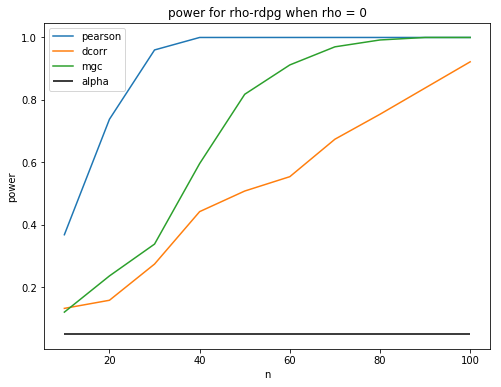

In [52]:
plot_power_rho_zero(power_rho_zero_rdpg, 'rho-rdpg')

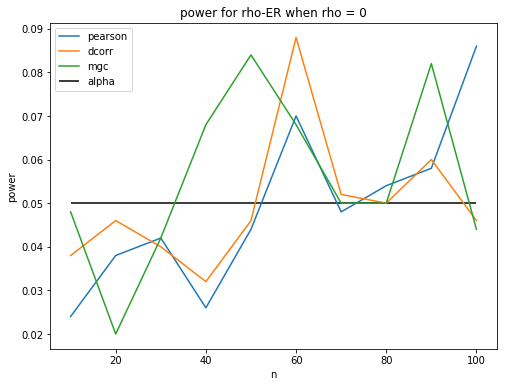

In [53]:
plot_power_rho_zero(power_rho_zero_ER, 'rho-ER')

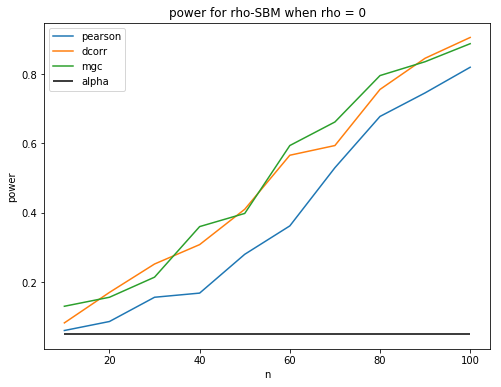

In [54]:
plot_power_rho_zero(power_rho_zero_sbm, 'rho-SBM')